In [155]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC,LinearSVC

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

Загрузить данные согласно своему варианту. Данные представляют собой таблицу, состоящую из 5 столбцов: 1 столбец – это номер класса, к которому принадлежит наблюдение, 2-4 столбцы – некоторые переменные, которыми задано текущее наблюдение.

In [156]:
df = pd.read_csv("/Users/nikita/Documents/Phyton/MSAD/LR-4/var4.csv", delimiter=";", decimal=",")
df.columns = ["class", "x1", "x2", "x3", "x4"]

X = df.drop(["class"], axis = 1)
y = df["class"]

In [157]:
df.head()

,class,x1,x2,x3,x4
0,1,-1.864688,1.663167,-1.487180,-2.279378
1,1,-2.747837,-1.742745,-0.795037,-2.964115
2,1,-1.596884,0.792023,-1.807053,-2.025940
3,1,-2.173674,-0.976062,-1.577488,-2.288297
4,1,-3.926378,1.279969,-1.645811,-3.846924


In [158]:
df.shape

(150, 5)

Удалить из выборки 15 случайных наблюдений (сохранить их отдельно). Оставшуюся выборку назовем обучающей. По ней мы будет обучать классификаторы. Сохраненные отдельно 15 наблюдений будем называть проверочной выборкой, по ней мы будем проверять качество классификатора.

In [211]:
# 15 / 150 = 0.1
#y-номер класса 
#x-данные 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1,random_state=40)

Построить линейный классификатор для решения задачи классификации (см. файл FilzmoserLections.pdf стр. 50-51). Метод основан на применении модели линейной регрессии для классификации. Реализовать классификатор означает обучить его на имеющейся выборке (если это необходимо), после чего уметь классифицировать любое новое наблюдение. Обучить классификатор на обучающей выборке. Применить его к проверочной выборке. Вывести количество ошибок, которое дал построенный классификатор для проверочной выборки.

##### Model1

In [212]:
class LinearClassifier(BaseEstimator):
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.classes_count = len(self.classes)
        
        x = np.hstack((np.atleast_2d(np.ones(X.shape[0])).T, X))
        Y = np.hstack([np.atleast_2d((y == c).astype(np.int)).T for c in self.classes])
        
        self.B = np.linalg.inv(x.T @ x) @ x.T @ Y
        
        return self
    
    def predict(self, X):
        return self.classes[np.argmax(np.hstack((np.atleast_2d(np.ones(X.shape[0])).T, X)) @ self.B, 1)]
    def score(self,x,y):
        pred=self.predict(x)
        err=np.sum(pred != y)
        return 1-err/(x.size)

In [213]:
model1=LinearClassifier()
model1.fit(train_X,train_y)
pred1=model1.predict(test_X)

In [214]:
model1.score(test_X,test_y)

0.95

##### Model2


In [215]:
model21 = LinearRegression() #модель линейной регрессии
model22 = LinearRegression()
model23 = LinearRegression()
#model2.fit(X = train_X, y=train_y)#ее обучение

In [216]:
def replace_val(to_replace,replacement,mas):
    for j in range(mas['class'].size):
        if(mas['class'][j]==to_replace):
            mas['class'][j]=replacement
    return mas

In [217]:
data_copy1=df.copy()
data_copy1=replace_val(2,0,data_copy1)
data_copy1=replace_val(3,0,data_copy1)
x1 = data_copy1.drop(["class"], axis = 1)
y1 = data_copy1["class"]
x_train1,x_test1,y_train1, y_test1 = train_test_split(x1, y1, test_size=0.1,random_state=40)
model21.fit(x_train1,y_train1)
pred1=model21.predict(x_test1)

In [218]:
data_copy2=df.copy()
data_copy2=replace_val(1,0,data_copy2)
data_copy2=replace_val(3,0,data_copy2)
x2 = data_copy2.drop(["class"], axis = 1)
y2 = data_copy2["class"]
x_train2,x_test2,y_train2, y_test2 = train_test_split(x2, y2, test_size=0.1,random_state=40)
model22.fit(x_train2,y_train2)
pred2=model22.predict(x_test2)

In [219]:
data_copy3=df.copy()
data_copy3=replace_val(1,0,data_copy3)
data_copy3=replace_val(2,0,data_copy3)
x3 = data_copy3.drop(["class"], axis = 1)
y3 = data_copy3["class"]
x_train3,x_test3,y_train3, y_test3 = train_test_split(x3, y3, test_size=0.1,random_state=40)
model23.fit(x_train3,y_train3)
pred3=model23.predict(x_test3)

In [220]:
total_pred=np.array([pred1,pred2,pred3])
prediction=np.zeros(total_pred[0].size)
#print(total_pred[0].size)
for i in range(total_pred[0].size):
    min=0
    num=0
    for j in range(3):
        if total_pred[j][i]>min:
            min=total_pred[j][i]
            num=j+1
    prediction[i]=num
#    print(max)
err=0
for j in range(prediction.size):
    err=np.sum(prediction != test_y)
print("Score of classification is ",1-err/prediction.size)

Score of classification is  0.7333333333333334


##### Model3

In [221]:
model3 = SVC(kernel='linear', C=1.0)
model3.fit(train_X, train_y)
y_pred_svm = model3.predict(test_X)
print("test  score:  ", model3.score(test_X, test_y))

test  score:   0.8


Реализовать метод классификации k-ближайших соседей (ссылка, kNN, k-nearest neighbors).
Для k = 3 и k = 5. Для нахождения расстояния использовать классическую Евклидову метрику.
Применить его к проверочной выборке. Вывести количество ошибок, которое дал построенный
классификатор для проверочной выборки.

In [222]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean").fit(train_X, train_y)#3 соседа, исходя из классов соседей строит свой класс
clf_knn_3.score(test_X, test_y)

0.8

In [223]:
clf_knn_5 = KNeighborsClassifier(n_neighbors=5, metric="euclidean").fit(train_X, train_y)#5 соседа
clf_knn_5.score(test_X, test_y)

0.8

(0,5 балла) Построить диаграмму рассеяния некоторых 2 переменных из переменных 2-4.
Цвет и форму точек менять в зависимости от номера класса.



<AxesSubplot:xlabel='x1', ylabel='x3'>

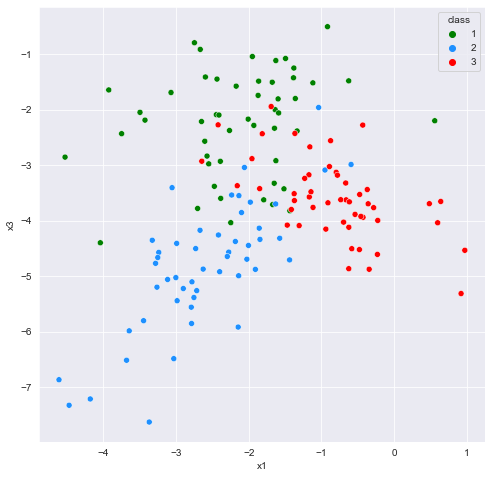

In [231]:
sns.scatterplot(x="x1", y="x3", hue="class", data=df, legend='full',
                palette=['green', 'dodgerblue', 'red'])#диаграмма рассеяния - распределение классов по двум переменным

(1 балл) Построить линейный классификатор, на основе только 2 выбранных в пункте 5
переменных. Изобразить на этой диаграмме границы классов, получаемые для построенного
линейного классификатора.



In [232]:
def task_6(X, y):
    if X.shape[1] == 4:#размерность 4
        X = (X[["x1", "x3"]]).to_numpy()
    y = y.to_numpy()

    h = .02  # step size in the mesh

    C = 1.0  # SVM regularization parameter - 
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)# метод опорных векторов - построение гиперплоскости для разделения классов, гиперплоскость: расстояние до опорных векторов каждого класса
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)# метод опорных векторов
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)# метод опорных векторов
    lin_svc = svm.LinearSVC(C=C).fit(X, y)# метод опорных векторов

    # create a mesh to plot in- построение сетки для построения гиперплоскости
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    plt.rcParams["figure.figsize"] = (12, 12)

    
    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):#проход по моделям
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

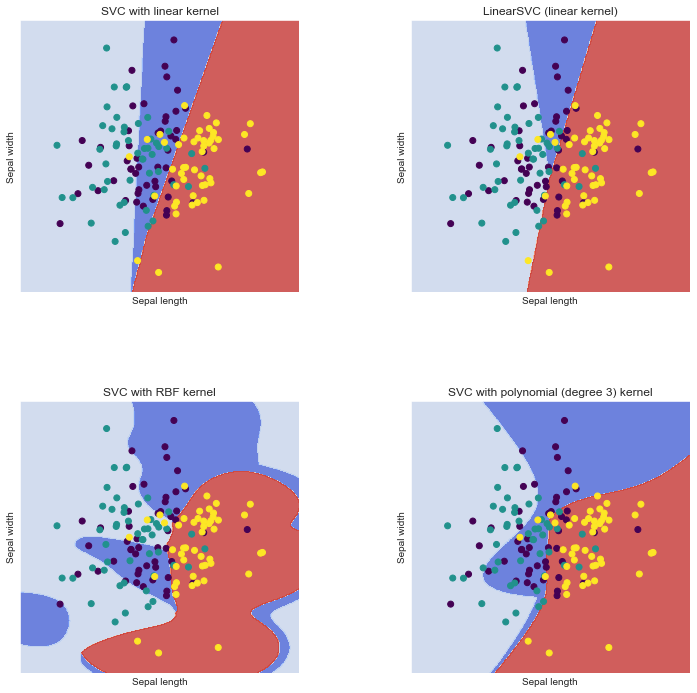

In [129]:
task_6(X, y)

(1 балл) Реализовать метод дискриминантного анализа (см. файл FilzmoserLections.pdf стр. 53). Обучить классификатор на обучающей выборке. Применить его к проверочной выборке. Вывести количество ошибок, которое дал построенный классификатор для проверочной выборки.

In [200]:
class LDA:
    
    def __init__(self, n_comnonents):
        self.n_comnonents = n_comnonents
        self.linear_discrimination = None
        self.data = None
    
    def fit(self, X, y):
        n_features = X.shape[1] # 100, 4
        class_labels = np.unique(y)
        
        mean_overall = np.mean(X, axis = 0) # (1,4)
        
        S_W = np.zeros((n_features, n_features)) # 4, 4
        S_B = np.zeros((n_features, n_features)) # 4, 4

        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0) # (1, 4)
            # (4, n_c) @ (n_c, 4) = (4, 4)
            S_W += (X_c - mean_c).T @ (X_c - mean_c) 
            
            n_c = X_c.shape[1]
            # (4,1) @ (1,4) = (4,4)
            mean_diff = mean_c - mean_overall
            S_B += n_c * mean_diff.T @ (mean_diff)
        
        A = np.linalg.inv(S_W) @ S_B
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discrimination = eigenvectors[0, self.n_comnonents]
        
    def transform(self, X):
        # project data into new
        self.data = np.dot(X, self.linear_discrimination.T)
        return self.data
    
    def predict(self, X):
          pass
            

In [201]:
lda = LDA(2)
lda.fit(train_X, train_y)
X_projected = lda.transform(train_X)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

ValueError: 'c' argument has 135 elements, which is inconsistent with 'x' and 'y' with size 600.

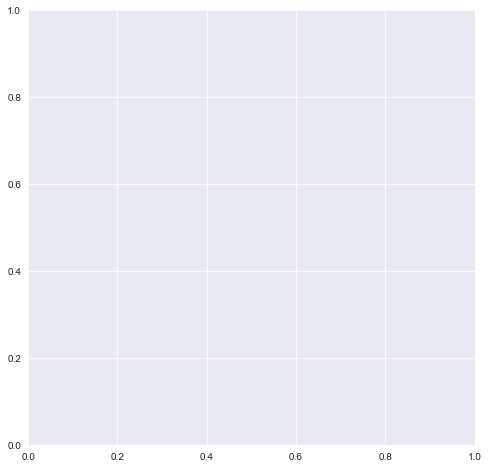

In [237]:
plt.scatter(x1, x3, c=train_y, cmap=plt.cm.get_cmap("viridis", 3))

In [203]:
import numpy

class LDA_myne: #обучился на train_data и предиктит классы
    
    def fit(self, X, t):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()
        
        self.classes = np.unique(t)

        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            self.covs[c] = np.cov(X_c, rowvar=False)

    def predict(self, X):
        preds = list()
        for x in X.to_numpy():
            posts = list()
            for c in self.classes:
                prior = np.log(self.priors[c])#априорная оценка точности метода
                inv_cov = np.linalg.inv(self.covs[c])
                mean_c = self.means[c]
                likelihood = x.T @ inv_cov * mean_c - 0.5 * mean_c.T @ inv_cov @ mean_c #формула выше
                post = likelihood + prior
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

In [209]:
print_acc(acc_train, acc_test)

Accuracy
Train: 0.8814814814814815
 Test: 0.8


(1 балл) Реализовать метод квадратичного
дискриминантного анализа (см. файл FilzmoserLections.pdf стр. 53). Обучить классификатор на обучающей выборке. Применить его к проверочной выборке. Вывести количество ошибок, которое дал построенный классификатор для проверочной выборки.

In [130]:
import numpy

class QDA:
    def fit(self, X, t):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()
        
        self.classes = np.unique(t)

        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            self.covs[c] = np.cov(X_c, rowvar=False)

    def predict(self, X):
        preds = list()
        for x in X.to_numpy():
            posts = list()
            for c in self.classes:
                prior = np.log(self.priors[c])
                inv_cov = np.linalg.inv(self.covs[c])
                inv_cov_det = np.linalg.det(inv_cov)
                diff = x-self.means[c]
                likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                post = prior + likelihood
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

In [140]:
qda = QDA()
qda.fit(train_X, train_y)
preds_train = qda.predict(train_X)
preds_test  = qda.predict(test_X)

acc_train = accuracy_score(preds_train, train_y)
acc_test = accuracy_score(preds_test, test_y)

In [182]:
def print_acc(acc_train, acc_test):
    print("Accuracy")
    print(f"Train: {acc_train}")
    print(f" Test: {acc_test}")

In [210]:
print_acc(acc_train, acc_test)

Accuracy
Train: 0.8814814814814815
 Test: 0.8


Разобраться в методе опорных векторов (svm, support vector machine) для 2 классов. В выборке оставить наблюдения только из 2 классов. Применить готовую реализацию. Проинтерпретировать полученные результаты. Проиллюстрировать результаты работы метода.

In [226]:
df_2_class = df[(df["class"] == 1) | (df["class"] == 2)]

In [235]:
X_2_class, y_2_class = df_2_class.drop(columns=["class"]), df_2_class["class"]

In [228]:
train_X_2, test_X_2, train_y_2, test_y_2 = train_test_split(X_2_class, y_2_class, test_size=0.20)

In [234]:
lsvm = LinearSVC()
lsvm.fit(train_X_2, train_y_2)
preds_train = qda.predict(train_X_2)
preds_test  = qda.predict(test_X_2)

acc_train = accuracy_score(preds_train, train_y_2)
acc_test = accuracy_score(preds_test, test_y_2)

print_acc(acc_train, acc_test)

Accuracy
Train: 0.8625
 Test: 0.9
